<a href="https://colab.research.google.com/github/Shivvamm04/Sales_pridiction/blob/main/pridict_sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
url = "https://raw.githubusercontent.com/Shivvamm04/Sales_pridiction/main/irrigation.csv"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv(url)
df.head()

,Temprature,Water level,Humidity,Moisture,Rain,Moter O/P
0,48,380,40,85,0,20
1,32,300,60,78,0,30
2,35,500,85,89,0,0
3,40,350,78,90,1,0
4,15,195,75,75,0,24


In [6]:
df.shape

(39, 6)

In [7]:
df.corr()

,Temprature,Water level,Humidity,Moisture,Rain,Moter O/P
Temprature,1.000000,0.077991,-0.446249,-0.021013,0.130833,0.099548
Water level,0.077991,1.000000,0.035166,0.610599,-0.197820,-0.515982
Humidity,-0.446249,0.035166,1.000000,0.117065,0.043392,-0.273365
Moisture,-0.021013,0.610599,0.117065,1.000000,0.038539,-0.477954
Rain,0.130833,-0.197820,0.043392,0.038539,1.000000,-0.580979
Moter O/P,0.099548,-0.515982,-0.273365,-0.477954,-0.580979,1.000000


<AxesSubplot:xlabel='Water level', ylabel='Moter O/P'>

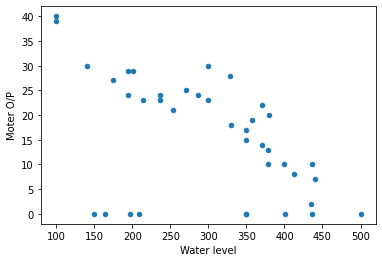

In [8]:
df.plot(kind = 'scatter',x = "Water level", y = "Moter O/P")

<AxesSubplot:xlabel='Humidity', ylabel='Moter O/P'>

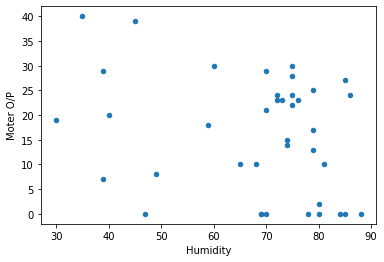

In [9]:
df.plot(kind = 'scatter',x = "Humidity", y = "Moter O/P")

<AxesSubplot:xlabel='Moisture', ylabel='Moter O/P'>

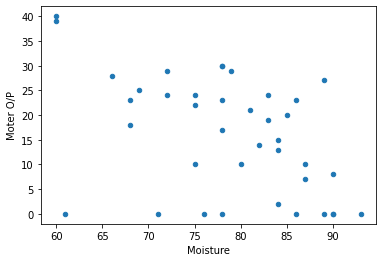

In [10]:
df.plot(kind = 'scatter',x = "Moisture", y = "Moter O/P")

In [11]:
# X = df["TV"].values.reshape(-1,1)
# Y = df["Sales"].values.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test= train_test_split(df,test_size = 0.2, random_state = 42)

In [13]:
df = X_train.drop("Moter O/P",axis = 1)
df_op = X_train["Moter O/P"].copy()

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [15]:
# df_t_p = my_pipeline.fit_transform(df)

In [16]:
df.shape

(31, 5)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(df,df_op)

RandomForestRegressor()

In [18]:
some_data = df.iloc[:5]

In [19]:
some_labels = df_op.iloc[:5]

In [20]:
# prepared_data = my_pipeline.transform(some_data)

In [21]:
model.predict(some_data)

array([12.82, 18.14, 23.14, 36.77, 25.93])

In [22]:
list(some_labels)

[13, 19, 23, 40, 29]

In [23]:
from sklearn.metrics import mean_squared_error
df_predictions = model.predict(df)
mse = mean_squared_error(df_op, df_predictions)
rmse = np.sqrt(mse)

In [24]:
rmse

2.3292626550324957

In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df, df_op, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [26]:
rmse_scores

array([ 3.62135679,  4.14428924,  5.45856208,  4.55315641,  4.85604778,
        6.3363107 , 11.18245948,  4.69727581,  1.9668079 , 13.11513375])

In [27]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [28]:
print_scores(rmse_scores)

Scores: [ 3.62135679  4.14428924  5.45856208  4.55315641  4.85604778  6.3363107
 11.18245948  4.69727581  1.9668079  13.11513375]
Mean:  5.99313999506276
Standard deviation:  3.291749104389002


In [29]:
from joblib import dump, load
dump(model, 'irrigation.joblib') 

['irrigation.joblib']

In [30]:
X_t = X_test.drop("Moter O/P", axis=1)
Y_t = X_test["Moter O/P"].copy()
# X_test_prepared = my_pipeline.transform(X_t)
final_predictions = model.predict(X_t)
final_mse = mean_squared_error(Y_t, final_predictions)
final_rmse = np.sqrt(final_mse)

In [31]:
final_rmse

8.021443136992247

In [32]:
# df[0] //prepared_data

In [34]:
dt = [[40, 440, 39, 83, 0]]
# ch_d = my_pipeline.transform(dt)
# ch_d[0]